# Exploratory Data Analysis & Visualizations
This process includes cleaning data, identifying strongly correlated features, and visualizing these features.

## Data Cleaning

The dataset is first filtered to only include those who tested positive for COVID-19. This step reduces the number of observations from 5644 patients to 558. Features that are recorded using string values (i.e. "negative"/"positive", "not_detected"/"detected") are converted to 0s and 1s, respectively. The dataset has 108 features.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
pd.__version__


df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')

df.info()
d={"negative":0, "positive":1,"not_detected":0,"detected":1} #edit string data
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1) #remove redundant features, these are captured by the criticality measure
df.info() #information on cleaned dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 112 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(5), object(37)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 67 to 5643
Columns: 108 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(89), int64(2), object(17)
memory usage: 475.2+ KB


## Missing Data

The cleaned dataset is then checked for missing data. This process reveals that only 6 features are complete, and none of the individual patients have a full set of feature data. Thus, simply discarding the entries with missing data is not an option. To address this, we use mean/modes to fill in the missed data below.

In [2]:
import pandas as pd
pd.__version__

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')

d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

print(df.isnull().sum()) #count missing data
print("Shape of Original DataFrame: {}".format(df.shape)) 
df1 = df.dropna(0); #drop rows with missing values
df1 = df1.dropna(1); #drop columns with missing values
print("Shape of DataFrame After Dropping All Columns & Rows with Missing Values: {}".format(df1.shape))
print(df1.info())

Patient ID                              0
Patient age quantile                    0
criticality                             0
Hematocrit                            475
Hemoglobin                            475
                                     ... 
HCO3 (arterial blood gas analysis)    545
pO2 (arterial blood gas analysis)     545
Arteiral Fio2                         549
Phosphor                              557
ctO2 (arterial blood gas analysis)    545
Length: 108, dtype: int64
Shape of Original DataFrame: (558, 108)
Shape of DataFrame After Dropping All Columns & Rows with Missing Values: (0, 108)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Columns: 108 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(89), int64(2), object(17)
memory usage: 0.0+ bytes
None


In [3]:
import pandas as pd
pd.__version__

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')

d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

print(df.isnull().sum()) #missing data before imputation
df=df.fillna(df.mean()) #using mean to impute
print(df.isnull().sum()) #missing data before imputation

Patient ID                              0
Patient age quantile                    0
criticality                             0
Hematocrit                            475
Hemoglobin                            475
                                     ... 
HCO3 (arterial blood gas analysis)    545
pO2 (arterial blood gas analysis)     545
Arteiral Fio2                         549
Phosphor                              557
ctO2 (arterial blood gas analysis)    545
Length: 108, dtype: int64
Patient ID                            0
Patient age quantile                  0
criticality                           0
Hematocrit                            0
Hemoglobin                            0
                                     ..
HCO3 (arterial blood gas analysis)    0
pO2 (arterial blood gas analysis)     0
Arteiral Fio2                         0
Phosphor                              0
ctO2 (arterial blood gas analysis)    0
Length: 108, dtype: int64


## Identifying Strongly Correlated Features
We identify features that have a correlation of greater than 0.4 . This process is conducted for both datasets (with and without the imputed values).

#### Feature Selection using Imputed Data
First, we find correlations with imputed data. Because we imputed a large amount of data, this would have impacted the feature distribution & correlations. 

There are 2 correlated values with sars-cov-2 exam result:
criticality                 1.000000
Proteina C reativa mg/dL    0.443399
Name: criticality, dtype: float64


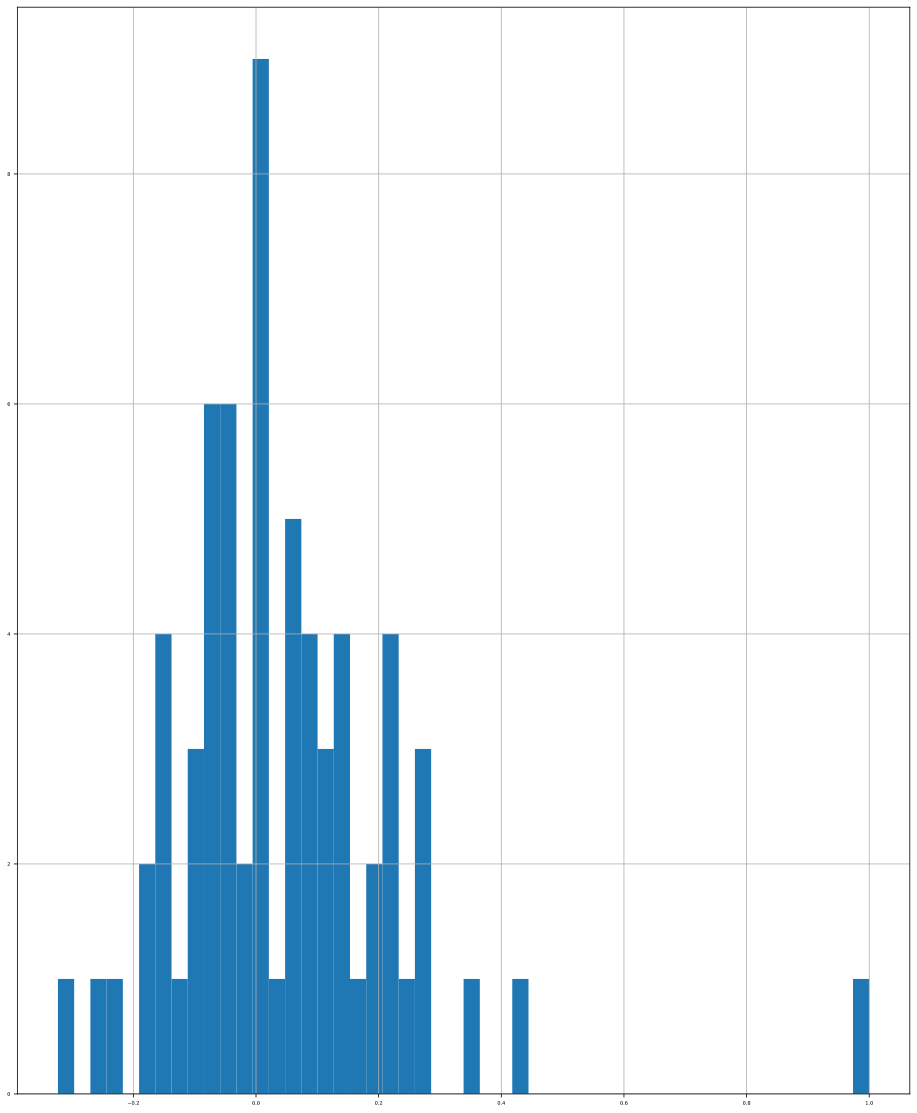

In [4]:
import pandas as pd
df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

df=df.fillna(df.mean()) #impute by filling in missing data with column means
df_num=df.select_dtypes(include=['float64', 'int64']) #create a new set with only features with numbers (no objects)
df_num_corr = df_num.corr()['criticality'][:-1] #find correlations to criticality
feature_list=df_num_corr[abs(df_num_corr)>.4].sort_values(ascending=False) #identify features with corr> 0.4
print("There are {} correlated values with sars-cov-2 exam result:\n{}".format(len(feature_list),feature_list))
df_num_corr.hist(figsize=(16,20),bins=50,xlabelsize=5,ylabelsize=5) #display all feature correlations


        

#### Feature Selection using Unimputed Data

The unimputed data reveals 6 strong features (ferritin and relationship features are removed due to limited sample size and high association with criticality, respectively).

There are 9 correlated values with sars-cov-2 exam result:
criticality                                  1.000000
Base excess (arterial blood gas analysis)    0.578535
Rods #                                       0.551175
Total CO2 (arterial blood gas analysis)      0.515233
HCO3 (arterial blood gas analysis)           0.513837
Proteina C reativa mg/dL                     0.491054
Alanine transaminase                         0.408853
Relationship (Patient/Normal)               -0.415772
Ferritin                                    -1.000000
Name: criticality, dtype: float64


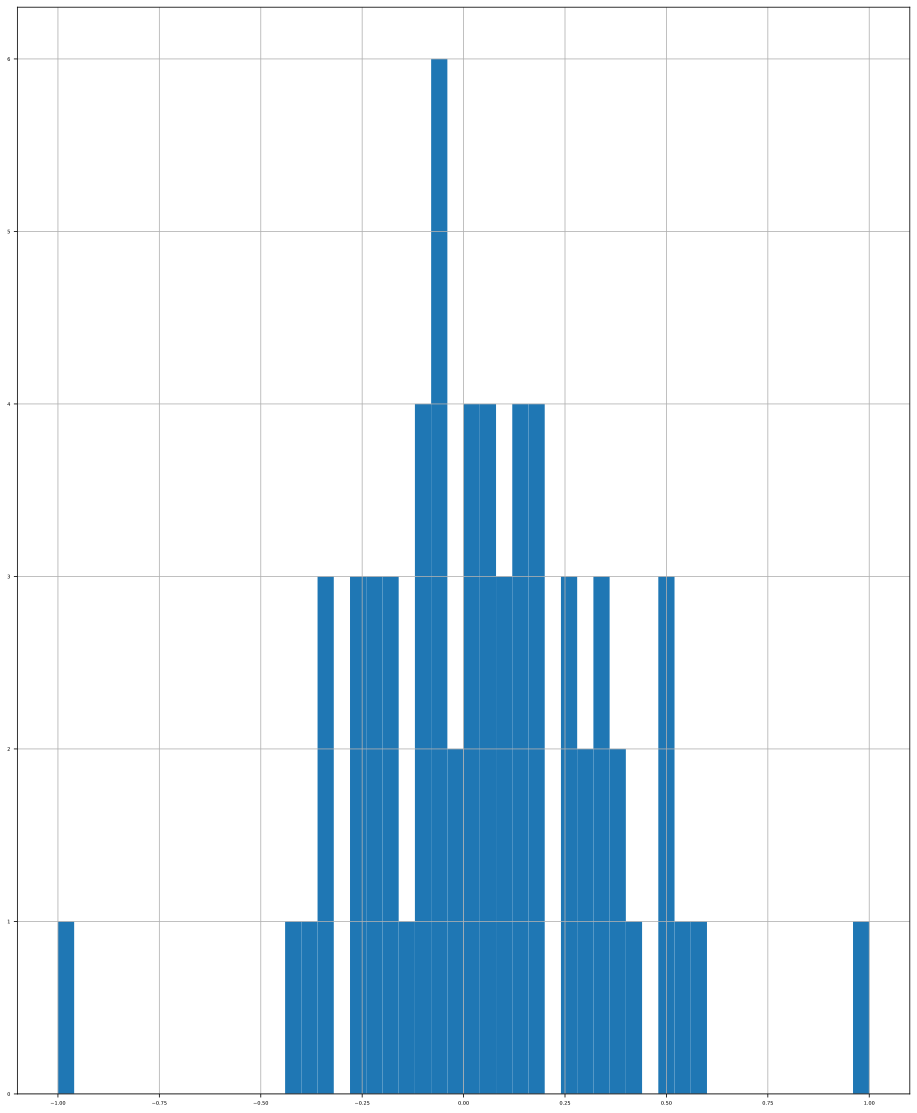

In [5]:
import pandas as pd
df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

df_num=df.select_dtypes(include=['float64', 'int64'])
df_num_corr = df_num.corr()['criticality'][:-1]
feature_list=df_num_corr[abs(df_num_corr)>.4].sort_values(ascending=False)
print("There are {} correlated values with sars-cov-2 exam result:\n{}".format(len(feature_list),feature_list))
df_num_corr.hist(figsize=(16,20),bins=50,xlabelsize=5,ylabelsize=5)


##### Because of the large differences between the two datasets in feature correlations, we will consider other imputation methods moving forward. 

## Visualizing Correlated Features
Using the dataset without imputed values, we visualize feature distributions and their relationships with criticality. 

### Correlation Heat Map
The heat map depicts the correlations between the 6 features and criticality.

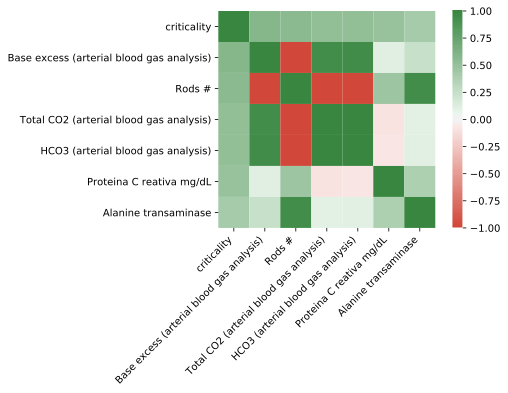

In [6]:
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#New feature & correlation set with only strong features
df_feat=df[['criticality','Base excess (arterial blood gas analysis)', 'Rods #','Total CO2 (arterial blood gas analysis)','HCO3 (arterial blood gas analysis)','Proteina C reativa mg/dL','Alanine transaminase']];

#Heatmap modified from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

corr = df_feat.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(15, 130, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


### Visualizing Demographics & Features

We plot the distribution of ages (measured in quantiles) of patients who tested positive for COVID-19. Quantiles are measurements of 5 years, ranging from 0-20 (1-100 years), with the median quantile of the cleaned dataset being 11 (50-55 years old).

The following plots capture the relationship between criticality and 7 features. From these plots, we find that most of these features have too few data points (i.e. Ferritin only has 2 points), which likely skews their correlation with criticality. This further demonstrates the need to address the issue of missing data.


11.0

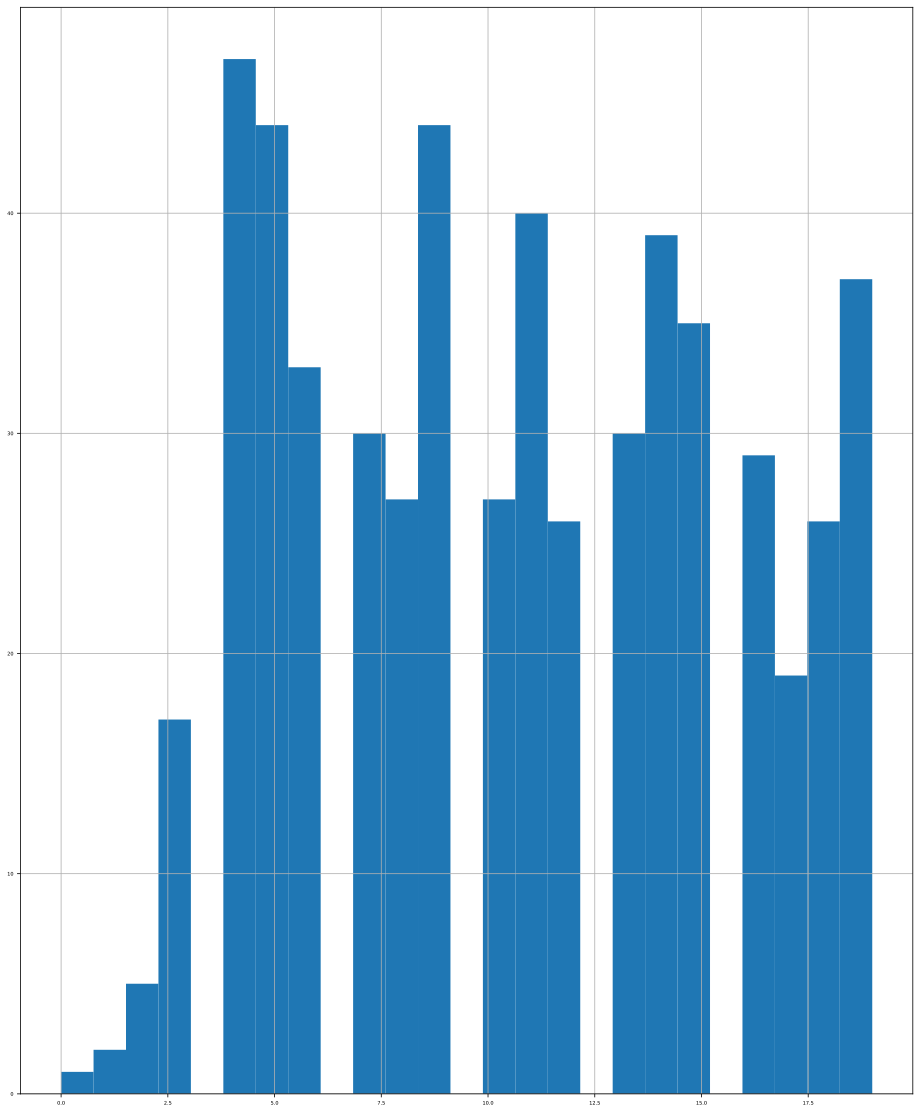

In [7]:
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]

#create histogram of only patient age quantiles
dfhist=df['Patient age quantile']
dfhist.hist(figsize=(16,20),bins=25,xlabelsize=5,ylabelsize=5)
dfhist.median()

#### Criticality vs Base excess (arterial blood gas analysis)

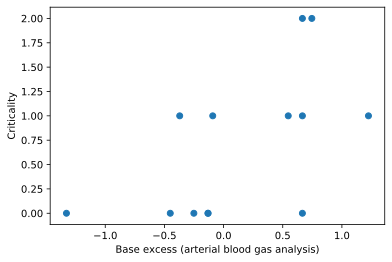

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Base excess (arterial blood gas analysis)'],df['criticality'])
plt.xlabel('Base excess (arterial blood gas analysis)')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs HCO3 (arterial blood gas analysis)

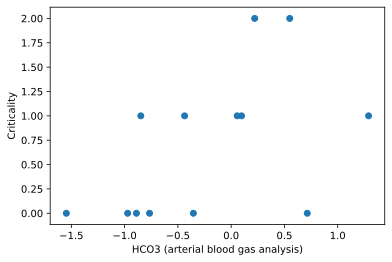

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['HCO3 (arterial blood gas analysis)'],df['criticality'])
plt.xlabel('HCO3 (arterial blood gas analysis)')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs Proteina C reativa mg/dL

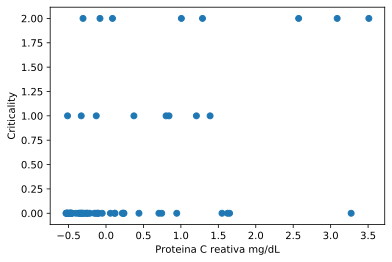

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Proteina C reativa mg/dL'],df['criticality'])
plt.xlabel('Proteina C reativa mg/dL')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs Alanine transaminase

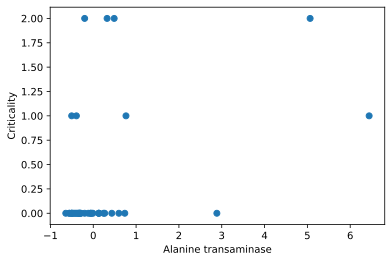

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Alanine transaminase'],df['criticality'])
plt.xlabel('Alanine transaminase')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs Ferritin
Note: The limited data; ferritin is dropped as a strong feature.

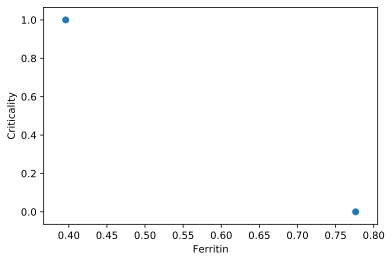

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Ferritin'],df['criticality'])
plt.xlabel('Ferritin')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs Rods Count

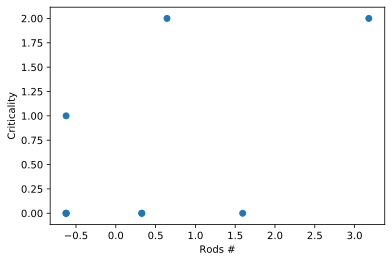

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Rods #'],df['criticality'])
plt.xlabel('Rods #')
plt.ylabel('Criticality')
plt.show()

#### Criticality vs Total CO2 (arterial blood gas analysis)

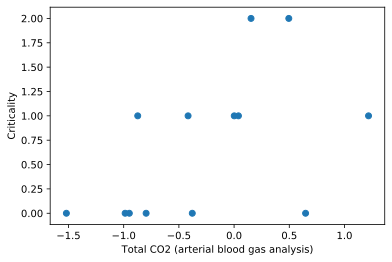

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)

#plot relationship between feature and criticality
plt.scatter(df['Total CO2 (arterial blood gas analysis)'],df['criticality'])
plt.xlabel('Total CO2 (arterial blood gas analysis)')
plt.ylabel('Criticality')
plt.show()

#### Distribution of Each Critical Feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18b09cd0>,
      dtype=object)

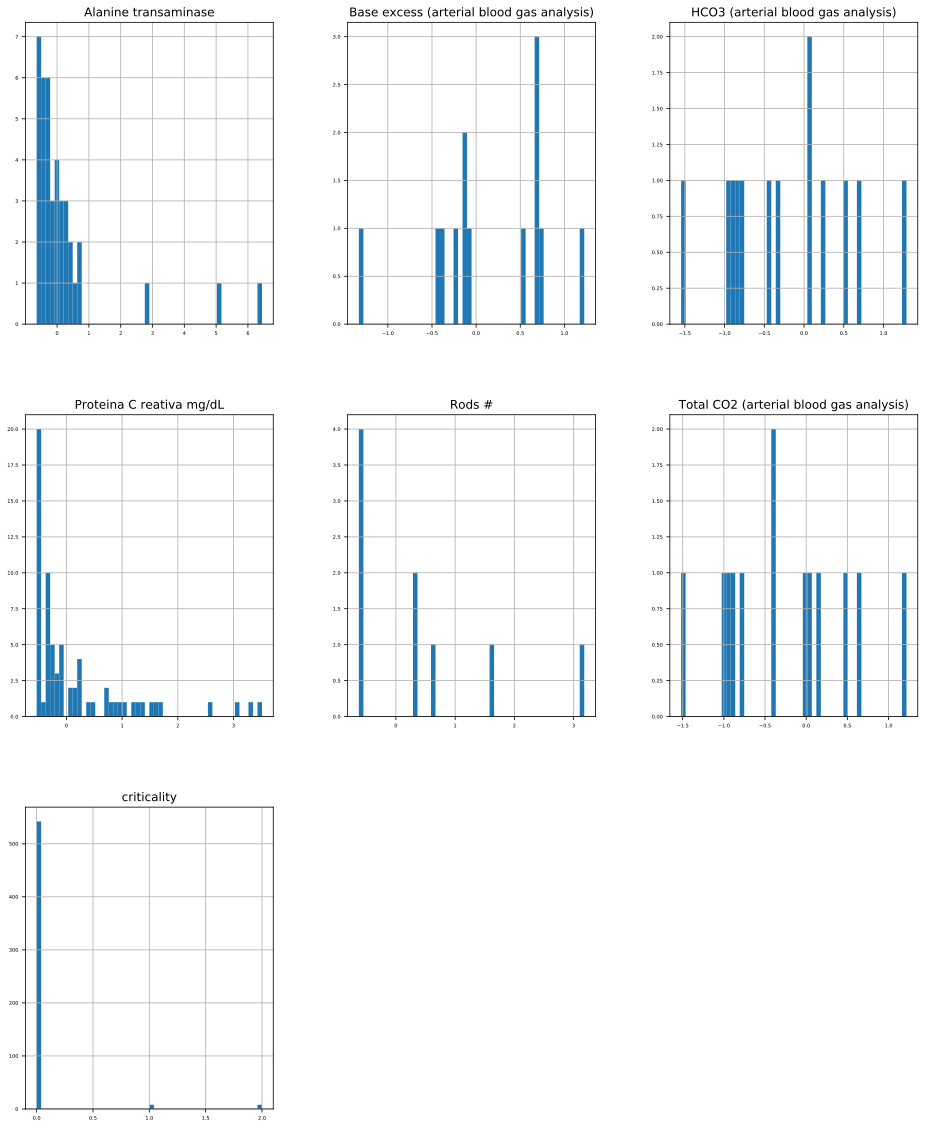

In [15]:
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv("dataset.csv", sep=',', encoding='latin-1')
d={"negative":0, "positive":1,"not_detected":0,"detected":1}
df=df.replace(d)
df=df.loc[(df['SARS-Cov-2 exam result'] == 1)]
df=df.drop(['SARS-Cov-2 exam result','Patient addmited to intensive care unit (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to regular ward (1=yes, 0=no)'], axis=1)
df_feat=df[['criticality','Base excess (arterial blood gas analysis)', 'Rods #','Total CO2 (arterial blood gas analysis)','HCO3 (arterial blood gas analysis)','Proteina C reativa mg/dL','Alanine transaminase']];

#plot distributions of key features and criticality
df_feat.hist(figsize=(16,20),bins=50,xlabelsize=5,ylabelsize=5)
